## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- new_price: Price of a new device of the same model in euros
- used_price: Price of the used/refurbished device in euros

### Import Libraries 

In [1]:
## for data preprocessing
import numpy as np
import pandas as pd

## for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## split data into train and validation set
from sklearn.model_selection import train_test_split

## linear regression model 
from sklearn.linear_model import LinearRegression, Ridge
## 
from sklearn.feature_extraction import DictVectorizer

##
from sklearn.metrics import r2_score

## hyper paramter tuning
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import loguniform




In [2]:
import os
os.getcwd()

'/home/moro/Documents/ml_weekendz_projects/ml_price_prediction_project'

### Load Data

In [3]:
## read dataset
data = pd.read_csv('dataset/used_device_data.csv')

In [4]:
## create a copy of the dataset
df = data.copy()

In [5]:
## lets preview the the dataset
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64


In [6]:
## lets check the number of rows and columns in the data
print(f"The number of rows: {df.shape[0]} -> The number of columns: {df.shape[1]}")

The number of rows: 3454 -> The number of columns: 15


In [7]:
## lets veiw a random sample of the data
df.sample(n=10, random_state=11)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
3426,Samsung,Android,15.42,yes,no,8.0,10.0,256.0,8.0,3300.0,183.0,2020,355,918.00,237.72
1907,Micromax,Android,12.70,no,no,16.0,8.0,32.0,4.0,2350.0,154.0,2014,888,239.57,90.89
3142,ZTE,Android,10.29,yes,no,8.0,5.0,32.0,4.0,2200.0,154.0,2015,711,68.59,57.62
2484,Samsung,Android,12.83,yes,no,13.0,5.0,16.0,4.0,3000.0,170.0,2017,706,180.62,79.71
2606,Samsung,Android,7.75,no,no,3.0,1.3,16.0,4.0,1300.0,118.2,2013,600,72.31,21.64
3006,XOLO,Android,12.70,no,no,5.0,0.3,16.0,4.0,2500.0,NaN,2015,679,77.26,46.39
2696,Sony,Android,12.70,yes,no,13.0,8.0,16.0,4.0,2300.0,137.4,2016,555,200.55,94.00
14,Honor,Android,14.50,yes,no,13.0,5.0,32.0,2.0,3020.0,146.0,2019,230,88.90,61.03
984,Coolpad,Android,12.83,yes,no,13.0,5.0,64.0,4.0,2800.0,170.0,2016,703,380.60,135.81
2832,Vivo,Android,16.74,yes,no,13.0,16.0,128.0,4.0,4000.0,199.0,2018,583,698.66,125.31


In [8]:
## lets check the column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   object 
 1   os                3454 non-null   object 
 2   screen_size       3454 non-null   float64
 3   4g                3454 non-null   object 
 4   5g                3454 non-null   object 
 5   main_camera_mp    3275 non-null   float64
 6   selfie_camera_mp  3452 non-null   float64
 7   int_memory        3450 non-null   float64
 8   ram               3450 non-null   float64
 9   battery           3448 non-null   float64
 10  weight            3447 non-null   float64
 11  release_year      3454 non-null   int64  
 12  days_used         3454 non-null   int64  
 13  new_price         3454 non-null   float64
 14  used_price        3454 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 404.9+ KB


In [9]:
## lets check for the number of duplicated values
df.duplicated().sum()

0

In [10]:
## lets check for missing values in our dataset
df.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

In [11]:
## lets perform a statistical summary on our dataframe 
df.describe().round()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
count,3454.0,3275.0,3452.0,3450.0,3450.0,3448.0,3447.0,3454.0,3454.0,3454.0,3454.0
mean,14.0,9.0,7.0,55.0,4.0,3133.0,183.0,2016.0,675.0,237.0,92.0
std,4.0,5.0,7.0,85.0,1.0,1300.0,88.0,2.0,249.0,194.0,55.0
min,5.0,0.0,0.0,0.0,0.0,500.0,69.0,2013.0,91.0,18.0,5.0
25%,13.0,5.0,2.0,16.0,4.0,2100.0,142.0,2014.0,534.0,120.0,56.0
50%,13.0,8.0,5.0,32.0,4.0,3000.0,160.0,2016.0,690.0,190.0,82.0
75%,15.0,13.0,8.0,64.0,4.0,4000.0,185.0,2018.0,869.0,291.0,116.0
max,31.0,48.0,32.0,1024.0,12.0,9720.0,855.0,2020.0,1094.0,2560.0,750.0


### Perform Exploratory Data Analysis

#### Perform A Target Variable Analysis

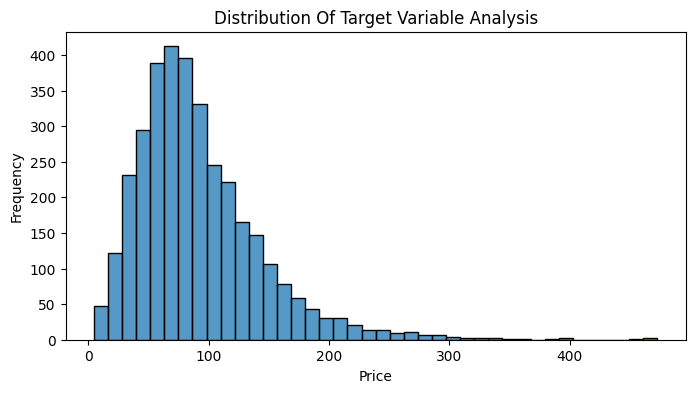

In [12]:
plt.figure(figsize=(8,4))

sns.histplot(df.used_price[df.used_price < 500], bins=40)
plt.title("Distribution Of Target Variable Analysis")
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

#### Lets Perform Log Transformation On Target Variable

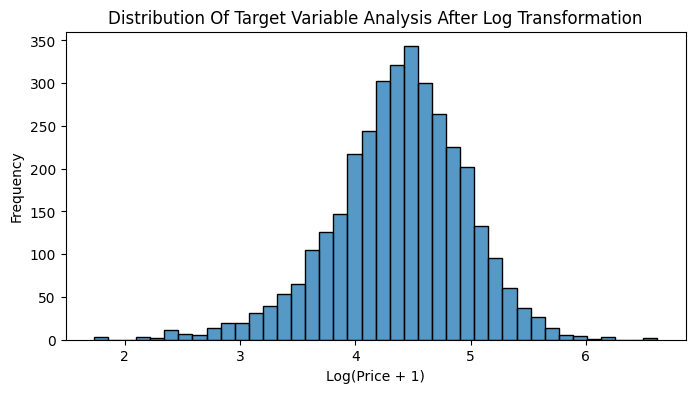

In [13]:
log_price = np.log1p(df.used_price)

plt.figure(figsize=(8,4))

sns.histplot(log_price, bins=40)
plt.title("Distribution Of Target Variable Analysis After Log Transformation")
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')

plt.show()

In [14]:
df['os'].unique()

array(['Android', 'Others', 'iOS', 'Windows'], dtype=object)

#### Plot A Distribution Of The Market Share Of Each OS 

<AxesSubplot: xlabel='os', ylabel='used_price'>

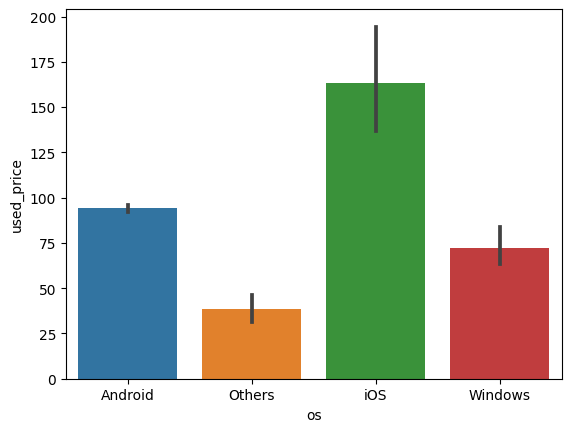

In [15]:

sns.barplot(data=df, x="os", y="used_price")

#### Devices Dominated By Android Devices

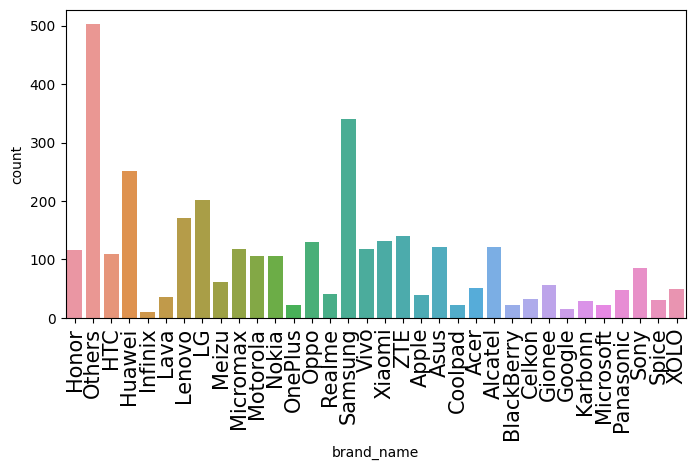

In [16]:
plt.figure(figsize=(8,4))

plt.xticks(rotation=90, fontsize=15)
sns.countplot(data=df, x="brand_name")


plt.show()


### Performing Feature Importance 


#### Attributes That Are Correlated With The Target Variable (Used_price)

In [17]:
## compute the correlation matrix on the dataframe
corr_matrix = df.corr(numeric_only=True)


corr_matrix['used_price'].sort_values(ascending=False)

used_price          1.000000
new_price           0.809335
selfie_camera_mp    0.614675
battery             0.549647
ram                 0.529434
screen_size         0.529275
release_year        0.494910
main_camera_mp      0.459209
int_memory          0.378347
weight              0.357983
days_used          -0.385777
Name: used_price, dtype: float64

#### Creating Categorical And Numerical Dataframes

### Building A Validation Framework

In [18]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_valid = train_test_split(df_train_full, test_size=0.25, random_state=11)

print(f'The Size Of The Training Set: {len(df_train)}')
print(f'The Size Of The Validation Set: {len(df_valid)}')
print(f'The Size Of The Test Set: {len(df_test)}')
print(f'The Size Of The Full Training Set: {len(df_train_full)}')

The Size Of The Training Set: 2072
The Size Of The Validation Set: 691
The Size Of The Test Set: 691
The Size Of The Full Training Set: 2763


#### Filling Missing Values

In [19]:
df_train_full = df_train_full.fillna(0)
df_train = df_train.fillna(0)
df_valid = df_valid.fillna(0)
df_test = df_test.fillna(0)

#### Select Target Variables And Log Transform Target Variables

In [20]:
y_train = np.log1p(df_train['used_price'])
y_valid = np.log1p(df_valid['used_price'])

#### Delete Taget Column From The Features

In [21]:
del df_train['used_price']
del df_valid['used_price']

#### Build A Baseline Model

In [22]:
## start with this five numerical features
baseline_features = ['new_price' , 'selfie_camera_mp', 'battery', 'ram' ,  'screen_size']        

In [23]:
## build baseline dataframe and convert into numpy array
X_train = df_train[baseline_features].values
X_valid = df_valid[baseline_features].values

In [24]:
## instantiate and train the logistic regression model

reg_baseline_model = LinearRegression()

reg_baseline_model.fit(X_train, y_train)

LinearRegression()

#### Validate Baseline Model

In [25]:
## generate validation predictions
y_pred_valid = reg_baseline_model.predict(X_valid)

In [26]:
## generate prediction score
acc_score = reg_baseline_model.score(X_valid, y_valid)
print(f'Baseline Validation Accuracy: {acc_score}')

Baseline Validation Accuracy: 0.742896014970184


In [27]:
## computing the intercept of the baseline model
reg_baseline_model.intercept_

3.0164766719588063

In [28]:
## computing the coefficients of the baseline model
reg_baseline_model.coef_

array([1.10763999e-03, 2.39013204e-02, 4.51078438e-05, 3.98481855e-02,
       4.62902737e-02])

### Performing Feature Engineering

#### Adding Additional Features And Converting Categorical Variables to Numerical Variables

In [29]:
numerical_var = ['new_price', 'selfie_camera_mp', 'battery', 'ram', 'screen_size', 'release_year', 'main_camera_mp']

categorical_var = ['4g', '5g']

In [ ]:
{
"screen_size" : 14.50, 
"4g" : "yes",	
"5g" :  "no",
"main_camera_mp": 13.0,	
"selfie_camera_mp": 5.0,	
"ram"	: 3.0, 
"battery": 3020.0,		
"release_year": 2020,	
"new_price"	: 111.62
}


In [30]:
df_train_fe = df_train[numerical_var + categorical_var]
df_valid_fe = df_valid[numerical_var + categorical_var]

In [31]:
## convert dataframe to pandas dictionary 
train_dict = df_train_fe.to_dict(orient='records')
valid_dict = df_valid_fe.to_dict(orient='records')

In [32]:
## instantiate and train dict vectorizer
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dict)
X_valid = dv.transform(valid_dict)


#### Train Linear Regression Model

In [33]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [34]:
## compute the score on the validation set
lin_reg_model.score(X_valid, y_valid)

0.803932577892366

In [35]:
## generate validation prediction
y_valid_pred = lin_reg_model.predict(X_valid)

In [36]:
## compute the accuracy score using r2_score 
r2_score(y_valid, y_valid_pred)

0.803932577892366

### Perform Regularization

In [37]:
lin_rid_model = Ridge()
lin_rid_model.fit(X_train, y_train)

Ridge()

In [38]:
##
lin_rid_model.score(X_valid, y_valid)

0.8039264188783279

### Hyper-parameter Tuning A Ridge Regression Model

In [39]:
alpha_values = [0, 0.0001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
for r in alpha_values:
    lin_reg_mod_2 = Ridge(alpha=r)
    lin_reg_mod_2.fit(X_train, y_train)

    ## compute the score on the validation set
    score = lin_reg_mod_2.score(X_valid, y_valid)

    print(f"Expected Mean Value {lin_reg_mod_2.intercept_} -> Accuracy Score: {round(score, 4)}")


Expected Mean Value 4391255681349.557 -> Accuracy Score: -22.914
Expected Mean Value 13.784414966378854 -> Accuracy Score: 0.8039
Expected Mean Value 13.784414966378854 -> Accuracy Score: 0.8039
Expected Mean Value 13.784369446413027 -> Accuracy Score: 0.8039
Expected Mean Value 13.783914241487906 -> Accuracy Score: 0.8039
Expected Mean Value 13.779361853127698 -> Accuracy Score: 0.8039
Expected Mean Value 13.733805621247843 -> Accuracy Score: 0.8039
Expected Mean Value 13.530780950469419 -> Accuracy Score: 0.8039
Expected Mean Value 13.276376822897362 -> Accuracy Score: 0.8039


### Training Final Model

In [40]:
y_train_full = np.log1p(df_train_full['used_price'])
y_test = np.log1p(df_test['used_price'])

In [41]:
del df_train_full['used_price']
del df_test['used_price']

In [42]:
df_train_full = df_train_full[numerical_var + categorical_var]
df_test = df_test[numerical_var + categorical_var]

train_full_dict = df_train_full.to_dict(orient='records')
train_test_dict = df_test.to_dict(orient='records')

dv = DictVectorizer(sparse=False)

X_train_full = dv.fit_transform(train_full_dict)
X_test = dv.transform(train_test_dict)

In [43]:
rid_reg_final_model = Ridge(alpha=0.0001)
rid_reg_final_model.fit(X_train_full, y_train_full)

Ridge(alpha=0.0001)

#### Evaluate Final Model On The Test Data

In [44]:
test_score = rid_reg_final_model.score(X_test, y_test)
print(f'Test Accuracy: {round(test_score, 2)}')

Test Accuracy: 0.77


### Saving The Final Model

In [49]:
import bentoml

saved_model = bentoml.sklearn.save_model("used_price_prediction", rid_reg_final_model, custom_objects={"dictVectorizer": dv})
print(f"Model saved: {saved_model}")

Model saved: Model(tag="used_price_prediction:5676jytahghpg6be")


### Loading Price Prediction Model

In [48]:
model = bentoml.sklearn.load_model("used_price_prediction:latest")